<a href="https://colab.research.google.com/github/CrissOG/CrissOG/blob/main/ANALISIS_EUROCOPA2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(
    '/euro2024_players.csv')
df.head(5)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [9]:
df.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


In [10]:
df.shape

(623, 10)

# ¿Que preguntas nos piden; que preguntas podemos sacar de esta informacion?

1. ¿Que equipo tiene el promedio de jugadores con la edad mas baja y cual es el equipo con el promedio de edad mas alta?
2. ¿Cuales son los jugadores sub23 con mas goles para la Eurocopa 2024?
3. ¿Cuales son los jugadores con mas edad en esta edicion de la Eurocopa?
4. ¿Cual es el club que mas jugadores atribuyo a este torneo?
5. ¿Los jugadores mas caros de esta edicion de la Eurocopa?

Y muchas mas preguntas pero responderemos estas...

###Aqui comenzaremos a analizar a los paises, sus jugadores y edades

In [111]:
df['Country'].unique()

array(['Germany', 'Scotland', 'Hungary', 'Switzerland', 'Spain',
       'Croatia', 'Albania', 'Italy', 'Slovenia', 'England', 'Denmark',
       'Serbia', 'Poland', 'Netherlands', 'Austria', 'France', 'Belgium',
       'Slovakia', 'Romania', 'Ukraine', 'Turkiye', 'Georgia', 'Portugal',
       'Czech Republic'], dtype=object)

In [29]:
df_edad = df.groupby('Country')['Age'].mean().sort_values(ascending=True)
df_edad

,Age
Country,
Czech Republic,25.307692
Turkiye,25.807692
England,26.076923
Ukraine,26.346154
Italy,26.500000
Netherlands,26.538462
Austria,26.807692
Belgium,26.880000
France,26.880000


Las edades mas bajas las tiene el pais de *Republica Checa* con `25.30` de media\
Y las edades mas altas las tienen los *escoceses* con `28.23` de promedio

Una representacion grafica para facilitar la lectura

<ipython-input-36-2a4968fa53ed>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.groupby('Country')['Age'].mean().sort_values(ascending=True).index, rotation=90)


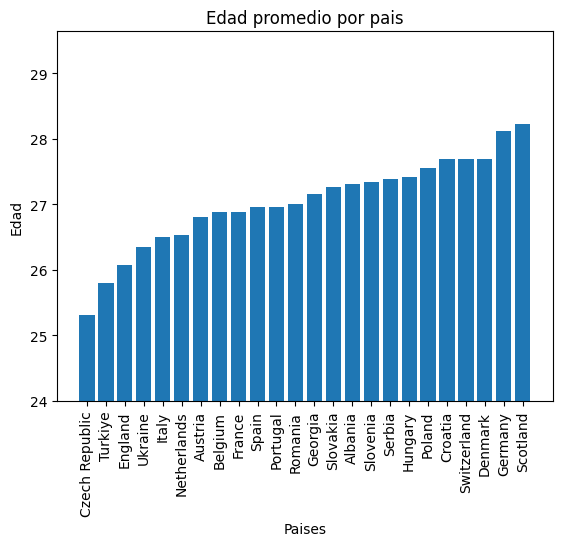

In [36]:
fig, ax = plt.subplots()
ax.bar(df.groupby('Country')['Age'].mean().sort_values(ascending=True).index, df.groupby('Country')['Age'].mean().sort_values(ascending=True))
ax.set_xlabel('Paises')
ax.set_xticklabels(df.groupby('Country')['Age'].mean().sort_values(ascending=True).index, rotation=90)
ax.set_ylabel('Edad')
#Con este codigo le ponemos en donde queremos que comiencen los datos a graficar
ax.set_ylim(24)
ax.set_title('Edad promedio por pais')
plt.show()

Ahora analizaremos los jugadores menores de 23 años para ver sus goles, como tambien sus paises

In [37]:
sub23goals = df[df['Age'] <= 23].sort_values(by='Goals', ascending=False).head(7)
sub23goals

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
563,Khvicha Kvaratskhelia,Left Winger,23,SSC Napoli,183,both,29,15,80000000,Georgia
67,Dominik Szoboszlai,Central Midfield,23,Liverpool FC,187,right,41,12,75000000,Hungary
255,Bukayo Saka,Right Winger,22,Arsenal FC,178,left,33,11,140000000,England
229,Benjamin Sesko,Centre-Forward,21,RB Leipzig,195,right,28,11,50000000,Slovenia
568,Georges Mikautadze,Centre-Forward,23,FC Metz,176,right,24,9,15000000,Georgia
595,Gonçalo Ramos,Centre-Forward,22,Paris Saint-Germain,185,right,12,8,50000000,Portugal
102,Zeki Amdouni,Centre-Forward,23,Burnley FC,185,both,14,7,12000000,Switzerland


# Mayores goleadores sub23
Tenemos al Georgiano Khvicha Kvaratskhelia como el maximo goleador de selecciones mas joven que llega a la Eurocopa 2024

Haremos una grafica para apreciar mejor los datos de arriba

<ipython-input-38-b6e39482f958>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub23goals['Name'], rotation=-40)


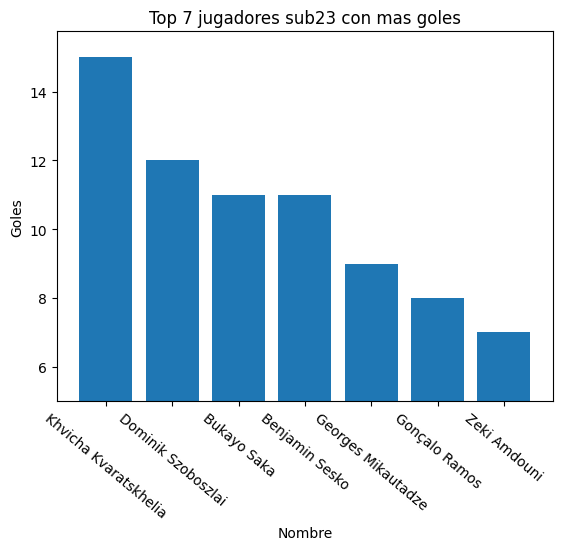

In [38]:
fig, ax = plt.subplots()
ax.bar(sub23goals['Name'], sub23goals['Goals'])
ax.set_xlabel('Nombre')
ax.set_ylabel('Goles')
ax.set_title('Top 7 jugadores sub23 con mas goles')
ax.set_ylim(5)
#Este codigo de abajo nos permite rotar los nombres para poder visualizarlos mejor
ax.set_xticklabels(sub23goals['Name'], rotation=-40)
plt.show()

Ahora veremos cuales son los jugadores mas longevos en participar en el torneo

In [88]:
players_viejos = df.nlargest(5, 'Age')['Name']
# df.groupby('Age')['Name'].unique().tail()
players_viejos

,Name
577,Pepe
596,Cristiano Ronaldo
1,Manuel Neuer
114,Jesús Navas
145,Luka Modric


# En este top hay mas balones de oro que todos los demas jugadores de la Eurocopa 2024 !!

Crearemos la grafica para ver este resultado

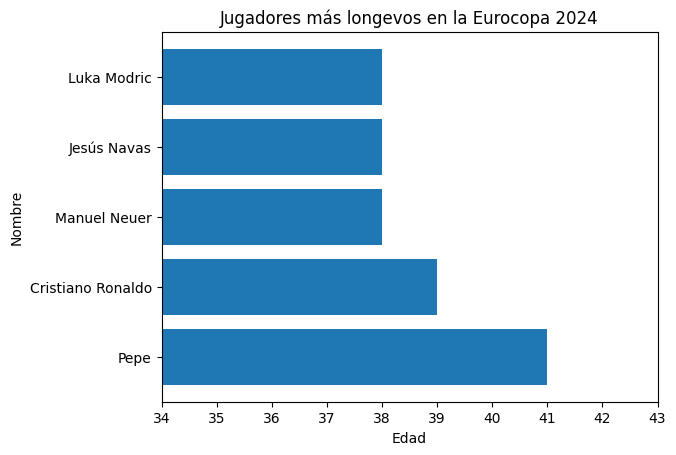

In [89]:
fig, ax = plt.subplots()
ax.barh(players_viejos, df.nlargest(5, 'Age')['Age'])
ax.set_xlabel('Edad')
ax.set_ylabel('Nombre')
ax.set_xlim(34,43)
ax.set_title('Jugadores más longevos en la Eurocopa 2024')
plt.show()


Ahora veremos que clubes tienen mas jugadores disputando esta Eurocopa

In [90]:
df['Club'].value_counts().sort_values(ascending=False).head(5)

,count
Club,
Inter Milan,13
Manchester City,13
FC Barcelona,12
Real Madrid,12
Paris Saint-Germain,12


Una grafica para representar mas facilmente estos numeros

<ipython-input-92-706c745488de>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Club'].value_counts().sort_values(ascending=False).head(5).index, rotation=20)


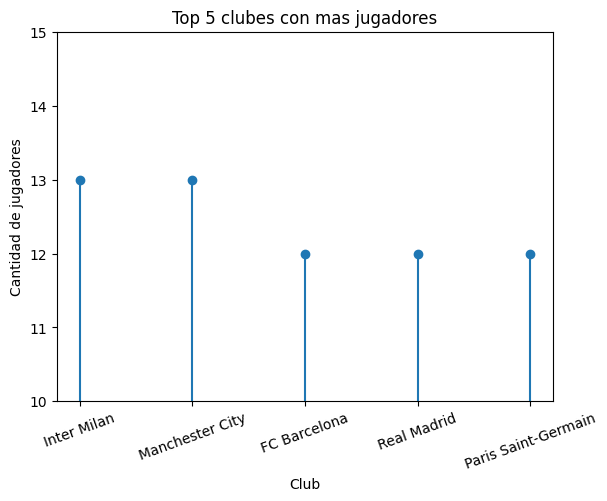

In [92]:
fig, ax = plt.subplots()
ax.stem(df['Club'].value_counts().sort_values(ascending=False).head(5).index, df['Club'].value_counts().sort_values(ascending=False).head(5))
ax.set_xlabel('Club')
ax.set_ylabel('Cantidad de jugadores')
ax.set_xticklabels(df['Club'].value_counts().sort_values(ascending=False).head(5).index, rotation=20)
ax.set_ylim(10,15)
ax.set_title('Top 5 clubes con mas jugadores')
plt.show()

# Como era de esperarse, los mejores equipos del mundo son los que mas jugadores aportan a los torneos de selecciones

Responderemos ahora que jugadores son los mas caros de el torneo

In [93]:
df.sort_values(by='MarketValue', ascending=False).head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
250,Jude Bellingham,Attacking Midfield,20,Real Madrid,186,right,29,3,180000000,England
411,Kylian Mbappé,Centre-Forward,25,Paris Saint-Germain,178,right,78,47,180000000,France
254,Phil Foden,Right Winger,24,Manchester City,171,left,34,4,150000000,England
255,Bukayo Saka,Right Winger,22,Arsenal FC,178,left,33,11,140000000,England
17,Florian Wirtz,Attacking Midfield,21,Bayer 04 Leverkusen,177,right,18,1,130000000,Germany


<ipython-input-97-76195fd9b779>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.sort_values(by='MarketValue', ascending=False).head()['Name'], rotation=-40)


Text(0.5, 1.0, 'Jugadores mas caros en la Eurocopa 2024')

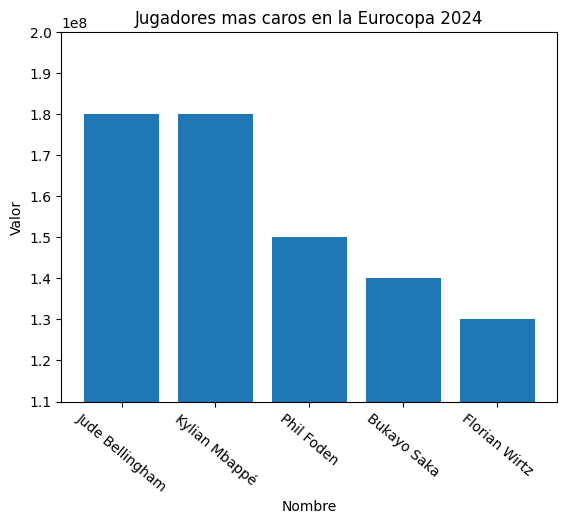

In [97]:
fig, ax = plt.subplots()
ax.bar(df.sort_values(by='MarketValue', ascending=False).head()['Name'], df.sort_values(by='MarketValue', ascending=False).head()['MarketValue'])
ax.set_xlabel('Nombre')
ax.set_ylabel('Valor')
ax.set_xticklabels(df.sort_values(by='MarketValue', ascending=False).head()['Name'], rotation=-40)
ax.set_ylim(110000000, 200000000)
ax.set_title('Jugadores mas caros en la Eurocopa 2024')

El ganador de la Champions y del ultimo Golden Boy se ha proclamado en uno de los mas valiosos de este mercado, `Jude Bellingham` \
Al igual que `Kylian Mbappé`, catalogado el mejor jugador en la actualidad, y que muchos afirman que ganara un balon de oro! \
Se espera mucho de estos jugadores en el torneo

# FINAL
Aqui finalizo este proyecto que he llamado "ANALISIS DE LA EUROCOPA 2024" \
Me autocritico diciendo que no es un trabajo totalmente profesional, pero me ha servido bastante para adentrarme aun mas en el analisis de datos y para poder sentirme en un espacio real de analisis, las preguntas no fueron muchas y fueron preguntas que se me han venido a la cabeza al momento de realizar este proyecto, se pueden sacar muchas mas preguntas e igual mucha mas informacion y datos. \
Seguire intentando mejorar este proyecto y tambien intentare usar la aplicacion de Power BI para realizar un DashBoard y tener un trabajo realmente profesional. \
Fecha de finalizacion `13/06/2024 - 1:08 PM`
